# Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the dataset

In [5]:
dataset=pd.read_csv("CardioGoodFitness.csv")
dataset.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


# Finding any missing data

In [7]:
dataset.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [8]:
## there are no missing values present

# Splitting the data into independent & dependent variable

In [9]:
dataset.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [37]:
X=dataset[['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
        'Income','Miles']]

y=dataset[['Fitness']]

# Handling Categorical Variables

In [38]:
X=pd.get_dummies(dataset[['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
    'Income','Miles']],
                 drop_first=True)

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   180 non-null    int64
 1   Education             180 non-null    int64
 2   Usage                 180 non-null    int64
 3   Income                180 non-null    int64
 4   Miles                 180 non-null    int64
 5   Product_TM498         180 non-null    uint8
 6   Product_TM798         180 non-null    uint8
 7   Gender_Male           180 non-null    uint8
 8   MaritalStatus_Single  180 non-null    uint8
dtypes: int64(5), uint8(4)
memory usage: 7.9 KB


In [40]:
X.head()

,Age,Education,Usage,Income,Miles,Product_TM498,Product_TM798,Gender_Male,MaritalStatus_Single
0,18,14,3,29562,112,0,0,1,1
1,19,15,2,31836,75,0,0,1,1
2,19,14,4,30699,66,0,0,0,0
3,19,12,3,32973,85,0,0,1,1
4,20,13,4,35247,47,0,0,1,0


In [41]:
y.head()

,Fitness
0,4
1,3
2,3
3,3
4,2


# Splitting the dataset into the Training set and Test set

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=.1,
                                              random_state=20)

# Training the Logistic Regression model on the Training set

In [53]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train.values,y_train)

/Users/ashleyridley/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ashleyridley/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
X_test, X_val, y_test, y_val=train_test_split(X_test,y_test,
                                              test_size=.15, random_state=30)

# Predicting a new result-validation set

-age: 22

-education:14

-usage: 2

-income:30699	

-Miles: 112

-Product_TM498:0

-Product_TM798:1

-Gender_Male:0

-MaritalStatus_Single:1


In [59]:
X_test.columns

Index(['Age', 'Education', 'Usage', 'Income', 'Miles', 'Product_TM498',
       'Product_TM798', 'Gender_Male', 'MaritalStatus_Single'],
      dtype='object')

In [60]:
print(classifier.predict([[22,14,2,30699,112,0,1,0,1]]))

[3]


# Making the confusion matrix

In [61]:
y_pred=classifier.predict(X_test)

/Users/ashleyridley/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [62]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[2 0 0 0]
 [0 8 0 1]
 [0 2 0 0]
 [0 0 0 2]]


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (5).

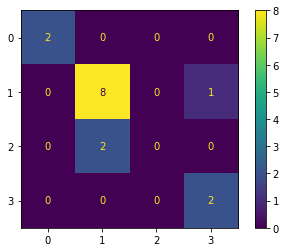

In [50]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,

                        display_labels=classifier.classes_)
disp.plot()
plt.show()

# Classification Report 

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00         2
           3       0.80      0.89      0.84         9
           4       0.00      0.00      0.00         2
           5       0.67      1.00      0.80         2

    accuracy                           0.80        15
   macro avg       0.62      0.72      0.66        15
weighted avg       0.70      0.80      0.75        15



/Users/ashleyridley/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashleyridley/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashleyridley/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

# Summary of Results